# Demo 3: Comparison with Scikit-Learn

For this demo of my own l2 regularized logistic regression implemented in Python I compare my results to those obtained using scikit-learn's built in logistic regression functions. The dataset I used for comparison is the Spam dataset from the Elements of Statistical Learning, which can be found at the following link:

https://web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.data

In this notebook I compare the results of my algorithm to scikit-learn's by reviewing the final model coefficients, the final objective function value acheived at convergence, and the misclassification error on the test set.

## Package Imports and Notebook Setup

In [30]:
# Import my logistic regression module
import src.logistic_regression as lr

# Import other required python packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Show all output from each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_inateractivity = "all"

## Import and Standardize Data

I import the spam dataset from the Elements of Statistical Learning datasets website (see link in introduction). I split the predictors and response into separate variables, and then convert the response to -1/+1 classes. I then split the data into training and test sets using the default split (25% allocated to the test set). The model will be trained using the training set, with the test set withheld for evaluating performance. Finally, I standardize the predictor data, which ensures that predictors of different scales do not dominate the minimization process. Here the response data does not need to be standardized since it is categorical.

In [4]:
# Import data
spam = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.data', sep=' ', header=None)

# Split data into predictors and response and change classes to -1/+1
x = spam.iloc[:, :-1]
y = spam.iloc[:, -1]
y = y*2 - 1

# Divide the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Standardize the predictor data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Initial Implementation & Check for Convergence

After importing and standardizing the data and before comparison to scikit learn, I run my model on this dataset to ensure it converges.

I initialize the model with a coefficient vector ('beta') of all zeros, and use a regularization parameter of 1. I then plot the resulting objective function value for each iteration of fast gradient descent. The stopping criteria used here is a tolerance for the change in the norm of the gradient at each iteration ('epsilon') which is set to 0.001.

In [31]:
# Initialize coefficients
n, d = x_train.shape
beta = np.zeros(d)

# Run fast gradient descent for l2 regularized logistic regression on full dataset
betas, objs = lr.fastgradalgo(beta_init=beta, lamda=1, x=x_train, y=y_train, t_init=1, epsilon=0.001)

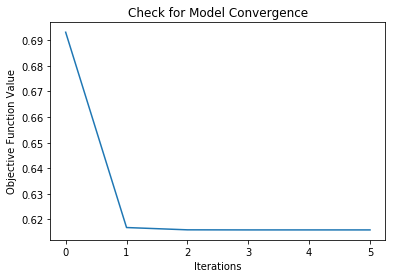

In [32]:
# Plot results
plt.plot(objs)
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('Check for Model Convergence')
plt.show();

As shown in the plot above, the solution for this method approaches the minimum after only 5 iterations. Now I can compare these results to those obtained with scikit learn.

## Comparison to Scikit-Learn

Here I compare my own logistic regression using the fast gradient descent algorithm to the results from scikit-learn's `LogisticRegression` function. For simplicity, I do this comparison on a dataset with only two classes (so my multi-class classification function are not called), and with chosen default regularization parameter (no crossvalidation). However, the results would be expected to be similar in a multi-class scenario.

Note that in order to complete an accurate comparison the regularization parameter must be adjusted when used in scikit-learn's LogisticRegression function. This is because scikit-learn's logistic regression implements normalization differently than my logistic regression does.

In [24]:
# Initialize coefficients
n, d = x_train.shape
beta = np.zeros(d)
lamda = 0.1

# Run my model and save results from final iteration
betas, objs = lr.fastgradalgo(beta_init=beta, lamda=lamda, x=x_train, y=y_train, t_init=1, epsilon=0.001)
my_beta = betas[-1]

# Run scikit learn LogisticRegression on data
model = LogisticRegression(C=1/(2*n*lamda))
model.fit(x_train, y_train)
skl_beta = model.coef_

### Final Coefficients

Here I compare the final coefficients found by my model with the ones found by scikit-learn's:

In [33]:
# Combine results
results = pd.DataFrame(np.c_[my_beta, skl_beta[0]])
results.columns = ['My Beta', 'Scikit Learn Beta']
print(round(results,5))

    My Beta  Scikit Learn Beta
0   0.02987            0.02630
1  -0.02219           -0.02434
2   0.08701            0.08718
3   0.05859            0.05689
4   0.17496            0.17449
5   0.12104            0.11794
6   0.29477            0.28364
7   0.13169            0.12874
8   0.12222            0.11603
9   0.05097            0.04897
10  0.13876            0.13135
11 -0.03823           -0.04014
12  0.05643            0.05416
13  0.03265            0.03171
14  0.10877            0.09645
15  0.19686            0.19225
16  0.15678            0.14824
17  0.11888            0.11531
18  0.11544            0.11659
19  0.12910            0.12074
20  0.23536            0.23309
21  0.10133            0.10083
22  0.25030            0.23420
23  0.15332            0.14583
24 -0.14810           -0.15736
25 -0.10432           -0.11462
26 -0.12077           -0.13039
27 -0.03483           -0.04095
28 -0.05002           -0.05779
29 -0.07555           -0.08107
30 -0.03293           -0.03931
31 -0.01

The resulting coefficients from my logistic regression are very close to those obtained using scikit-learn's logistic regression.

### Final Objective Value

Here I compare the final objective function value acheived at convergence for my algorithm versus scikit-learn's

In [26]:
# Calculate objective values
my_obj = lr.obj(beta=my_beta, lamda=0.1, x=x_train, y=y_train)
skl_obj = lr.obj(beta=skl_beta[0], lamda=0.1, x=x_train, y=y_train)

#show results
objs = pd.DataFrame(np.c_[my_obj, skl_obj])
objs.columns = ['My Obj', 'Sklearn Obj']
print(round(objs,5))

    My Obj  Sklearn Obj
0  0.45069      0.45113


The final objective function value acheived by my algorithm is very close to that acheived by scikit-learn's (difference of approximately 0.1%).

### Misclassification Error

Here I compare the misclassification error of my model to the misclassification error of scikit-learn's logistic regression.

In [29]:
# Calculate my predictions
my_predictions = my_beta.dot(x_test.T)
my_predictions[my_predictions >= 0] = 1
my_predictions[my_predictions < 0] = -1

# Get scikit learn's predictions
skl_predictions = model.predict(x_test)

# Calculate misclassification errors
my_misclass = (1 - np.mean(my_predictions == y_test))*100
skl_misclass = (1 - np.mean(skl_predictions == y_test))*100

# Show results
misclass = pd.DataFrame(np.c_[my_misclass, skl_misclass])
misclass.columns = ['My Misclassification', 'Sklearn Misclassification']
print(round(misclass,3))

   My Misclassification  Sklearn Misclassification
0                10.686                     10.252


The misclassification error for my model is very close to that from scikit-learn's. This is as expected given that the coefficients found by both models were very close to the same.